# First We Compute Gradients

In [1]:
# Re-defining the functions to recompute all values correctly

# Function to compute gradients for a batch
def compute_gradients(X_batch, y_batch, a, b):
    m = len(X_batch)  # Batch size
    y_pred = a + b * X_batch  # Predictions
    error = y_batch - y_pred  # Residuals

    # Gradients
    grad_a = -2 / m * np.sum(error)
    grad_b = -2 / m * np.sum(error * X_batch)

    return grad_a, grad_b

In [2]:
# Full-Batch Gradient Descent
def full_batch_gradient_descent(X, y, learning_rate, epochs):
    a, b = 0.0, 0.0  # Initialize parameters
    n = len(X)  # Total number of samples
    losses = []

    for epoch in range(epochs):
        # Compute gradients for the full dataset
        grad_a, grad_b = compute_gradients(X, y, a, b)

        # Update parameters
        a -= learning_rate * grad_a
        b -= learning_rate * grad_b

        # Compute loss
        loss = np.mean((y - (a + b * X))**2)
        losses.append(loss)

    return a, b, losses

In [3]:
# Mini-Batch Gradient Descent
def mini_batch_gradient_descent(X, y, batch_size, learning_rate, epochs):
    a, b = 0.0, 0.0  # Initialize parameters
    n = len(X)  # Total number of samples
    losses = []

    for epoch in range(epochs):
        # Shuffle the data
        indices = np.random.permutation(n)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        # Process each mini-batch
        for i in range(0, n, batch_size):
            X_batch = X_shuffled[i:i + batch_size]
            y_batch = y_shuffled[i:i + batch_size]

            # Compute gradients for the mini-batch
            grad_a, grad_b = compute_gradients(X_batch, y_batch, a, b)

            # Update parameters
            a -= learning_rate * grad_a
            b -= learning_rate * grad_b

        # Compute loss
        loss = np.mean((y - (a + b * X))**2)
        losses.append(loss)

    return a, b, losses

In [4]:
# Stochastic Gradient Descent
def stochastic_gradient_descent(X, y, learning_rate, epochs):
    a, b = 0.0, 0.0  # Initialize parameters
    n = len(X)  # Total number of samples
    losses = []

    for epoch in range(epochs):
        for i in range(n):
            # Compute gradients for a single data point
            grad_a, grad_b = compute_gradients(X[i:i + 1], y[i:i + 1], a, b)

            # Update parameters
            a -= learning_rate * grad_a
            b -= learning_rate * grad_b

        # Compute loss
        loss = np.mean((y - (a + b * X))**2)
        losses.append(loss)

    return a, b, losses

In [6]:
import numpy as np
# Generate example data
np.random.seed(42)
X = np.random.rand(100)  # 100 data points
y = 3 * X + 2 + np.random.randn(100) * 0.1  # Linear relation with noise

In [7]:
# Set hyperparameters
learning_rate = 0.01
epochs = 100

In [8]:
# Recompute for Full-Batch Gradient Descent
a_full, b_full, losses_full = full_batch_gradient_descent(X, y, learning_rate, epochs)

In [9]:
# Recompute for Mini-Batch Gradient Descent
a_mini, b_mini, losses_mini = mini_batch_gradient_descent(X, y, 20, learning_rate, epochs)

In [10]:
# Recompute for Stochastic Gradient Descent
a_sgd, b_sgd, losses_sgd = stochastic_gradient_descent(X, y, learning_rate, epochs)

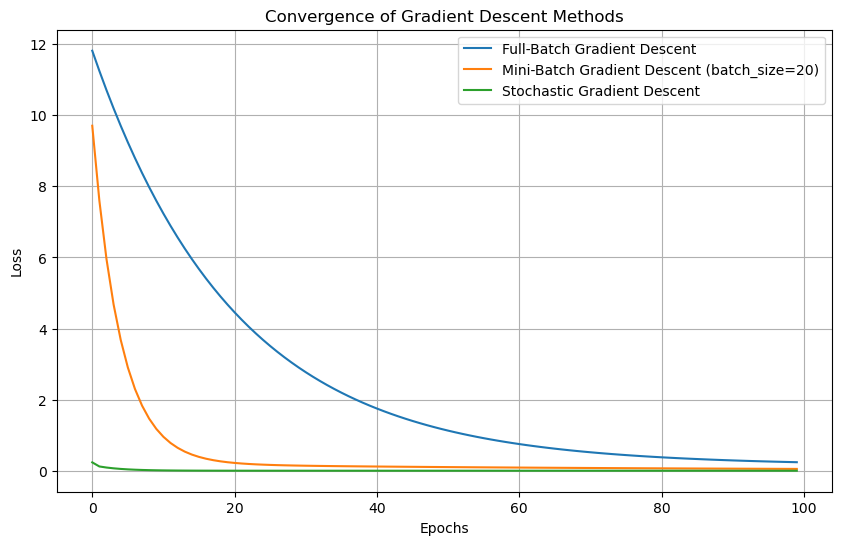

In [12]:
import matplotlib.pyplot as plt
# Plot convergence curves
plt.figure(figsize=(10, 6))
plt.plot(losses_full, label="Full-Batch Gradient Descent")
plt.plot(losses_mini, label="Mini-Batch Gradient Descent (batch_size=20)")
plt.plot(losses_sgd, label="Stochastic Gradient Descent")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Convergence of Gradient Descent Methods")
plt.legend()
plt.grid()
plt.show()

# **Gradient Descent Methods**

## **Full-Batch Gradient Descent**
- <span style="color:blue">Smooth convergence</span>, as the gradients are computed on the **entire dataset** at each step.

## **Mini-Batch Gradient Descent**
- <span style="color:green">Faster initial convergence</span> compared to full-batch gradient descent.
- <span style="color:orange">Slightly noisier</span> but stabilizes over time.

## **Stochastic Gradient Descent (SGD)**
- <span style="color:red">Very noisy convergence</span> due to updates on **individual samples**.
- <span style="color:purple">Quickly reduces loss</span> but <span style="color:brown">fluctuates significantly</span>.


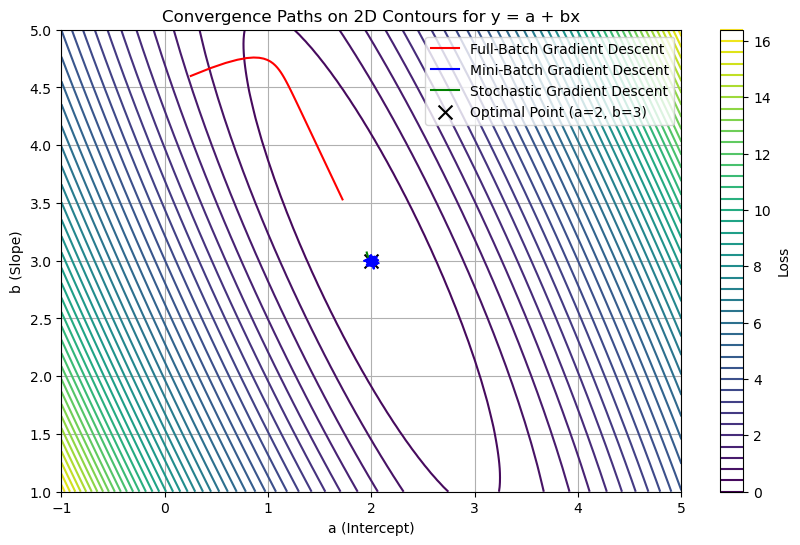

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Function to compute gradients for a batch
def compute_gradients(X_batch, y_batch, a, b):
    m = len(X_batch)  # Batch size
    y_pred = a + b * X_batch  # Predictions
    error = y_batch - y_pred  # Residuals

    # Gradients
    grad_a = -2 / m * np.sum(error)
    grad_b = -2 / m * np.sum(error * X_batch)

    return grad_a, grad_b

# Full-Batch Gradient Descent
def full_batch_gradient_descent(X, y, learning_rate, epochs):
    a, b = 0.0, 4.5  # Initialize parameters
    losses = []
    path = []  # Track parameter updates

    for epoch in range(epochs):
        grad_a, grad_b = compute_gradients(X, y, a, b)
        a -= learning_rate * grad_a
        b -= learning_rate * grad_b
        path.append((a, b))
        losses.append(np.mean((y - (a + b * X))**2))

    return np.array(path), losses

# Mini-Batch Gradient Descent with Momentum
def mini_batch_gradient_descent(X, y, batch_size, learning_rate, epochs, momentum=0.9):
    a, b = 0.0, 4.5  # Initialize parameters
    v_a, v_b = 0.0, 0.0  # Initialize momentum terms
    losses = []
    path = []  # Track parameter updates

    for epoch in range(epochs):
        indices = np.random.permutation(len(X))
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for i in range(0, len(X), batch_size):
            X_batch = X_shuffled[i:i + batch_size]
            y_batch = y_shuffled[i:i + batch_size]
            grad_a, grad_b = compute_gradients(X_batch, y_batch, a, b)
            v_a = momentum * v_a - learning_rate * grad_a
            v_b = momentum * v_b - learning_rate * grad_b
            a += v_a
            b += v_b
        path.append((a, b))
        losses.append(np.mean((y - (a + b * X))**2))

    return np.array(path), losses

# Stochastic Gradient Descent with Learning Rate Decay
def stochastic_gradient_descent(X, y, learning_rate, epochs, decay=0.01):
    a, b = 0.0, 4.5  # Initialize parameters
    losses = []
    path = []  # Track parameter updates

    for epoch in range(epochs):
        for i in range(len(X)):
            grad_a, grad_b = compute_gradients(X[i:i + 1], y[i:i + 1], a, b)
            lr = learning_rate / (1 + decay * epoch)
            a -= lr * grad_a
            b -= lr * grad_b
        path.append((a, b))
        losses.append(np.mean((y - (a + b * X))**2))

    return np.array(path), losses

# Generate example data
np.random.seed(42)
X = np.random.rand(10000)  # 100 data points
y = 3 * X + 2 + np.random.randn(10000) * 0.1  # Linear relation with noise

# Set hyperparameters
learning_rate = 0.1
epochs = 100

# Recompute parameter update paths and losses
path_full, losses_full = full_batch_gradient_descent(X, y, learning_rate, epochs)
path_mini, losses_mini = mini_batch_gradient_descent(X, y, 20, learning_rate, epochs)
path_sgd, losses_sgd = stochastic_gradient_descent(X, y, learning_rate, epochs)

# Create a grid for contour plotting
a_vals = np.linspace(-1, 5, 100)
b_vals = np.linspace(1, 5, 100)
A, B = np.meshgrid(a_vals, b_vals)

# Compute the loss surface
Z = np.zeros_like(A)
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        Z[i, j] = np.mean((y - (A[i, j] + B[i, j] * X))**2)

# Plot the contours and parameter update paths
plt.figure(figsize=(10, 6))
contour = plt.contour(A, B, Z, levels=50, cmap="viridis")
plt.colorbar(contour, label="Loss")
plt.plot(path_full[:, 0], path_full[:, 1], label="Full-Batch Gradient Descent", color="red")
plt.plot(path_mini[:, 0], path_mini[:, 1], label="Mini-Batch Gradient Descent", color="blue")
plt.plot(path_sgd[:, 0], path_sgd[:, 1], label="Stochastic Gradient Descent", color="green")
plt.scatter(2, 3, color="black", label="Optimal Point (a=2, b=3)", marker="x", s=100)
plt.xlabel("a (Intercept)")
plt.ylabel("b (Slope)")
plt.title("Convergence Paths on 2D Contours for y = a + bx")
plt.legend()
plt.grid()
plt.show()


Time taken by Full-Batch Gradient Descent: 0.0179 seconds
Time taken by Mini-Batch Gradient Descent: 0.8297 seconds
Time taken by Stochastic Gradient Descent: 13.9288 seconds


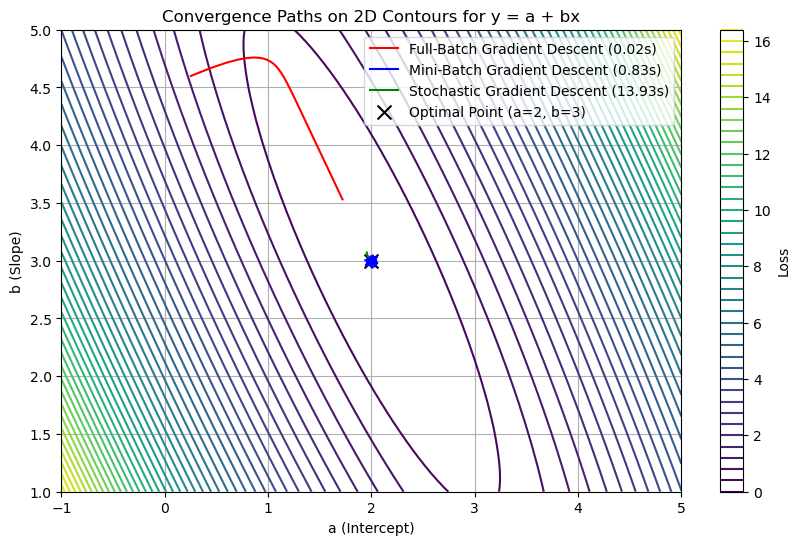

In [29]:
import time

# Measure time for Full-Batch Gradient Descent
start_time = time.time()
path_full, losses_full = full_batch_gradient_descent(X, y, learning_rate, epochs)
time_full = time.time() - start_time

# Measure time for Mini-Batch Gradient Descent
start_time = time.time()
path_mini, losses_mini = mini_batch_gradient_descent(X, y, 20, learning_rate, epochs)
time_mini = time.time() - start_time

# Measure time for Stochastic Gradient Descent
start_time = time.time()
path_sgd, losses_sgd = stochastic_gradient_descent(X, y, learning_rate, epochs)
time_sgd = time.time() - start_time

# Print time taken for each algorithm
print(f"Time taken by Full-Batch Gradient Descent: {time_full:.4f} seconds")
print(f"Time taken by Mini-Batch Gradient Descent: {time_mini:.4f} seconds")
print(f"Time taken by Stochastic Gradient Descent: {time_sgd:.4f} seconds")

# Plot the contours and parameter update paths
plt.figure(figsize=(10, 6))
contour = plt.contour(A, B, Z, levels=50, cmap="viridis")
plt.colorbar(contour, label="Loss")
plt.plot(path_full[:, 0], path_full[:, 1], label=f"Full-Batch Gradient Descent ({time_full:.2f}s)", color="red")
plt.plot(path_mini[:, 0], path_mini[:, 1], label=f"Mini-Batch Gradient Descent ({time_mini:.2f}s)", color="blue")
plt.plot(path_sgd[:, 0], path_sgd[:, 1], label=f"Stochastic Gradient Descent ({time_sgd:.2f}s)", color="green")
plt.scatter(2, 3, color="black", label="Optimal Point (a=2, b=3)", marker="x", s=100)
plt.xlabel("a (Intercept)")
plt.ylabel("b (Slope)")
plt.title("Convergence Paths on 2D Contours for y = a + bx")
plt.legend()
plt.grid()
plt.show()


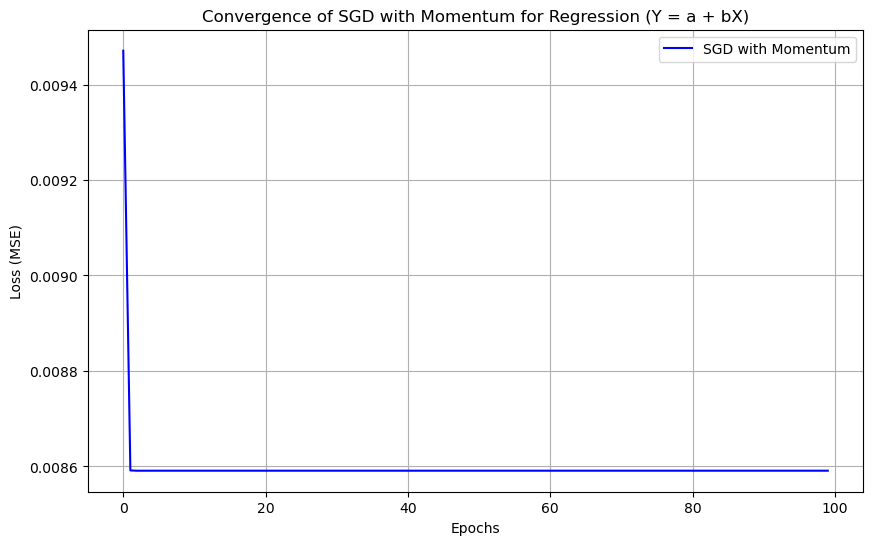

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Function to compute gradients for a batch
def compute_gradients(X_batch, y_batch, a, b):
    m = len(X_batch)  # Batch size
    y_pred = a + b * X_batch  # Predictions
    error = y_batch - y_pred  # Residuals

    # Gradients
    grad_a = -2 / m * np.sum(error)
    grad_b = -2 / m * np.sum(error * X_batch)

    return grad_a, grad_b

# Stochastic Gradient Descent with Momentum
def sgd_with_momentum(X, y, learning_rate, epochs, momentum=0.9):
    a, b = 0.0, 1.5  # Initialize parameters
    v_a, v_b = 0.0, 0.0  # Initialize velocity terms
    losses = []
    path = []  # Track parameter updates

    for epoch in range(epochs):
        for i in range(len(X)):
            # Compute gradients for a single data point
            grad_a, grad_b = compute_gradients(X[i:i + 1], y[i:i + 1], a, b)

            # Update velocities
            v_a = momentum * v_a - learning_rate * grad_a
            v_b = momentum * v_b - learning_rate * grad_b

            # Update parameters
            a += v_a
            b += v_b

        # Compute loss for the current epoch
        loss = np.mean((y - (a + b * X))**2)
        losses.append(loss)
        path.append((a, b))

    return np.array(path), losses

# Generate example data
np.random.seed(42)
X = np.random.rand(100)  # 100 data points
y = 3 * X + 2 + np.random.randn(100) * 0.1  # Linear relation with noise

# Hyperparameters
learning_rate = 0.01
epochs = 100
momentum = 0.9

# Run SGD with Momentum
path, losses = sgd_with_momentum(X, y, learning_rate, epochs, momentum)

# Plot the convergence curve
plt.figure(figsize=(10, 6))
plt.plot(range(epochs), losses, label="SGD with Momentum", color="blue")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Convergence of SGD with Momentum for Regression (Y = a + bX)")
plt.legend()
plt.grid()
plt.show()


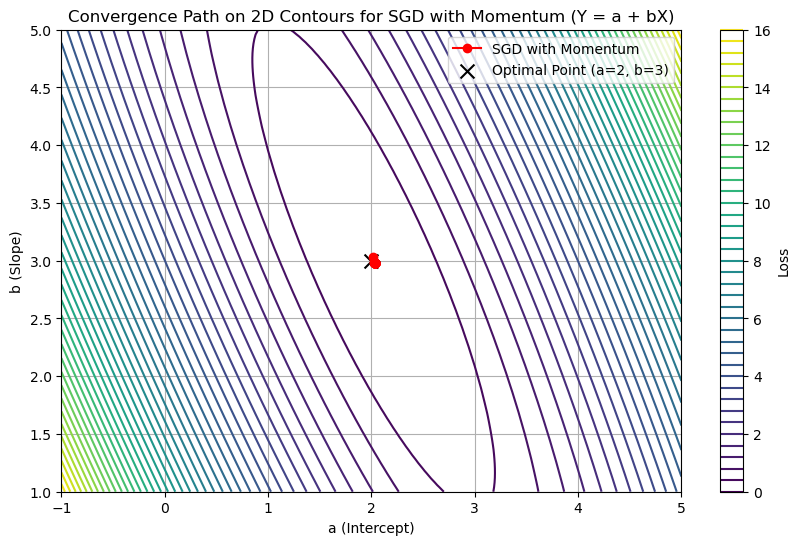

In [33]:
# Generate the loss surface for contour plotting
a_vals = np.linspace(-1, 5, 100)
b_vals = np.linspace(1, 5, 100)
A, B = np.meshgrid(a_vals, b_vals)

# Compute the loss surface
Z = np.zeros_like(A)
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        Z[i, j] = np.mean((y - (A[i, j] + B[i, j] * X))**2)

# Run SGD with Momentum
path, losses = sgd_with_momentum(X, y, learning_rate, epochs, momentum)

# Plot the 2D contours and parameter update path
plt.figure(figsize=(10, 6))
contour = plt.contour(A, B, Z, levels=50, cmap="viridis")
plt.colorbar(contour, label="Loss")
plt.plot(path[:, 0], path[:, 1], label="SGD with Momentum", color="red", marker="o")
plt.scatter(2, 3, color="black", label="Optimal Point (a=2, b=3)", marker="x", s=100)
plt.xlabel("a (Intercept)")
plt.ylabel("b (Slope)")
plt.title("Convergence Path on 2D Contours for SGD with Momentum (Y = a + bX)")
plt.legend()
plt.grid()
plt.show()


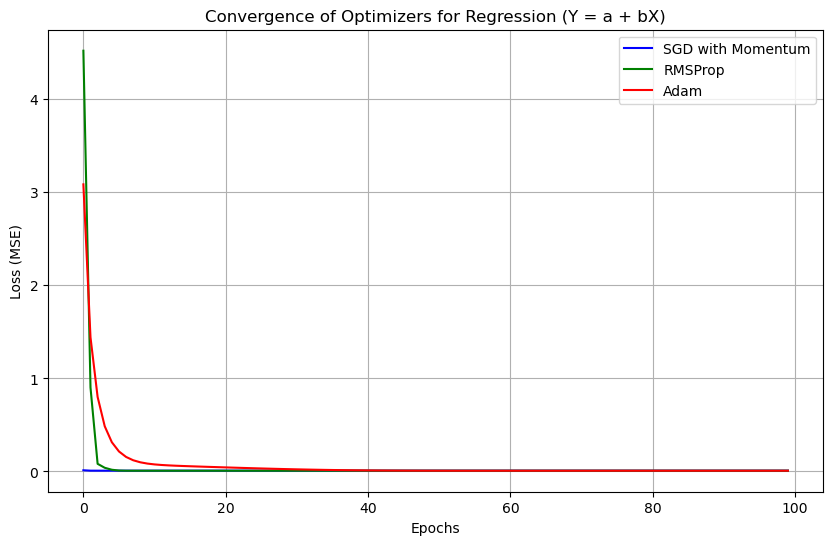

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Function to compute gradients for a batch
def compute_gradients(X_batch, y_batch, a, b):
    m = len(X_batch)  # Batch size
    y_pred = a + b * X_batch  # Predictions
    error = y_batch - y_pred  # Residuals

    # Gradients
    grad_a = -2 / m * np.sum(error)
    grad_b = -2 / m * np.sum(error * X_batch)

    return grad_a, grad_b

# SGD with Momentum
def sgd_with_momentum(X, y, learning_rate, epochs, momentum=0.9):
    a, b = 0.0, 0.0  # Initialize parameters
    v_a, v_b = 0.0, 0.0  # Initialize velocity terms
    losses = []

    for epoch in range(epochs):
        for i in range(len(X)):
            # Compute gradients for a single data point
            grad_a, grad_b = compute_gradients(X[i:i + 1], y[i:i + 1], a, b)

            # Update velocities
            v_a = momentum * v_a - learning_rate * grad_a
            v_b = momentum * v_b - learning_rate * grad_b

            # Update parameters
            a += v_a
            b += v_b

        # Compute loss for the current epoch
        loss = np.mean((y - (a + b * X))**2)
        losses.append(loss)

    return losses

# RMSProp
def rmsprop(X, y, learning_rate, epochs, beta=0.9, epsilon=1e-8):
    a, b = 0.0, 0.0  # Initialize parameters
    E_a, E_b = 0.0, 0.0  # Initialize moving averages of squared gradients
    losses = []

    for epoch in range(epochs):
        for i in range(len(X)):
            # Compute gradients for a single data point
            grad_a, grad_b = compute_gradients(X[i:i + 1], y[i:i + 1], a, b)

            # Update moving averages of squared gradients
            E_a = beta * E_a + (1 - beta) * grad_a**2
            E_b = beta * E_b + (1 - beta) * grad_b**2

            # Update parameters
            a -= learning_rate * grad_a / (np.sqrt(E_a) + epsilon)
            b -= learning_rate * grad_b / (np.sqrt(E_b) + epsilon)

        # Compute loss for the current epoch
        loss = np.mean((y - (a + b * X))**2)
        losses.append(loss)

    return losses

# Adam
def adam(X, y, learning_rate, epochs, beta1=0.9, beta2=0.999, epsilon=1e-8):
    a, b = 0.0, 0.0  # Initialize parameters
    m_a, m_b = 0.0, 0.0  # First moment vectors
    v_a, v_b = 0.0, 0.0  # Second moment vectors
    losses = []

    for epoch in range(1, epochs + 1):
        for i in range(len(X)):
            # Compute gradients for a single data point
            grad_a, grad_b = compute_gradients(X[i:i + 1], y[i:i + 1], a, b)

            # Update biased first moment estimates
            m_a = beta1 * m_a + (1 - beta1) * grad_a
            m_b = beta1 * m_b + (1 - beta1) * grad_b

            # Update biased second moment estimates
            v_a = beta2 * v_a + (1 - beta2) * grad_a**2
            v_b = beta2 * v_b + (1 - beta2) * grad_b**2

            # Bias correction
            m_a_hat = m_a / (1 - beta1**epoch)
            m_b_hat = m_b / (1 - beta1**epoch)
            v_a_hat = v_a / (1 - beta2**epoch)
            v_b_hat = v_b / (1 - beta2**epoch)

            # Update parameters
            a -= learning_rate * m_a_hat / (np.sqrt(v_a_hat) + epsilon)
            b -= learning_rate * m_b_hat / (np.sqrt(v_b_hat) + epsilon)

        # Compute loss for the current epoch
        loss = np.mean((y - (a + b * X))**2)
        losses.append(loss)

    return losses

# Generate example data
np.random.seed(42)
X = np.random.rand(100)  # 100 data points
y = 3 * X + 2 + np.random.randn(100) * 0.1  # Linear relation with noise

# Hyperparameters
learning_rate = 0.01
epochs = 100

# Run all optimizers
losses_sgd_momentum = sgd_with_momentum(X, y, learning_rate, epochs, momentum=0.9)
losses_rmsprop = rmsprop(X, y, learning_rate, epochs, beta=0.9, epsilon=1e-8)
losses_adam = adam(X, y, learning_rate, epochs, beta1=0.9, beta2=0.999, epsilon=1e-8)

# Plot the convergence curves
plt.figure(figsize=(10, 6))
plt.plot(range(epochs), losses_sgd_momentum, label="SGD with Momentum", color="blue")
plt.plot(range(epochs), losses_rmsprop, label="RMSProp", color="green")
plt.plot(range(epochs), losses_adam, label="Adam", color="red")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Convergence of Optimizers for Regression (Y = a + bX)")
plt.legend()
plt.grid()
plt.show()
